
## Project Google Play Store Apps

Title: Android App Market Trend

Author: Tung Fu Wei

Date:25 April

Purpose:

Methodology: read, clean, analyse


Findings: 



Recommendation/Conclusion:

Inspiration:
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In [1]:
## https://www.kaggle.com/lava18/google-play-store-apps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('googleplaystore.csv')

In [2]:
df.info()
#rating has numeric only while review, size and install should be numeric too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
df.drop_duplicates(subset ='App', keep= 'first',inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [4]:
df.head() #print a few line 
#df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.isnull().sum()#check on missing data

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dropna(how = 'any', inplace = True) ##remove all missin data

In [7]:
df.isnull().sum() # recheck on any missing data

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.shape

(8190, 13)

Text(0, 0.5, 'Frequency')

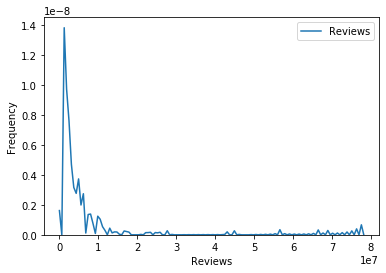

In [9]:
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))
g = sns.kdeplot(df.Reviews)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
#findings: most of the apps dont have any reviews

The average rating of apps in Google Play is 4.173321123321126 .


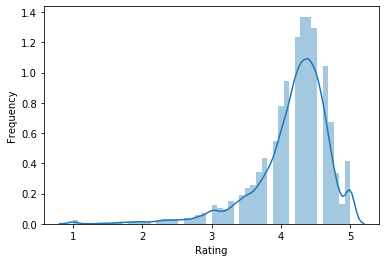

In [10]:
h = sns.distplot(df.Rating)
h.set_xlabel("Rating")
h.set_ylabel("Frequency")
print('The average rating of apps in Google Play is',df.Rating.mean(),'.')
#findings: majority app has rating range between 4-4.5

In [11]:
#filter installs ',''+'
df.Installs = df['Installs'].apply(lambda x : x.replace(',',''))
df.Installs = df['Installs'].apply(lambda x : x.replace('+',''))
df.Installs = df['Installs'].apply(lambda x : int(x))
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8190, dtype: int64

Text(0, 0.5, 'Frequency')

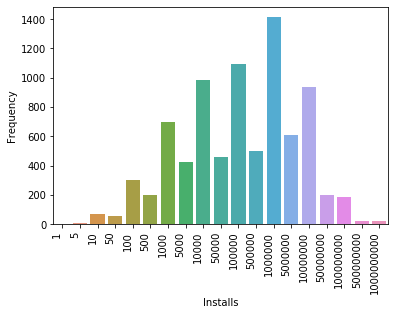

In [12]:
#findings: app distribution on installs
j = sns.countplot(df.Installs)
j.set_xlabel("Installs")
j.set_xticklabels(j.get_xticklabels(), rotation=90, ha="right")
j.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

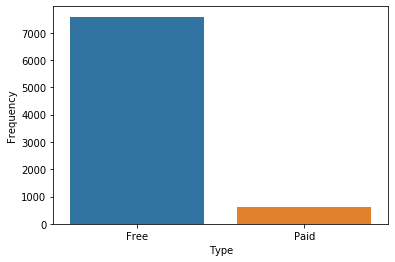

In [13]:
#free and paid distribution on Google Play
f = sns.countplot(df.Type)
f.set_xlabel("Type")
# f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right")
f.set_ylabel("Frequency")

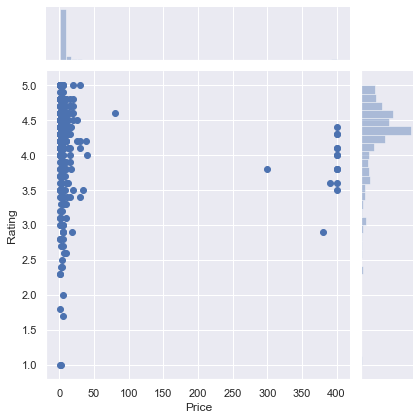

In [54]:
#to find out the paid app vs rating
#filter price
df['Price']=df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price']=df['Price'].apply(lambda x: float(x))
p = df[df.Price >0]
p = sns.jointplot('Price','Rating',p)
# q = df[df.Price > 300]
# q

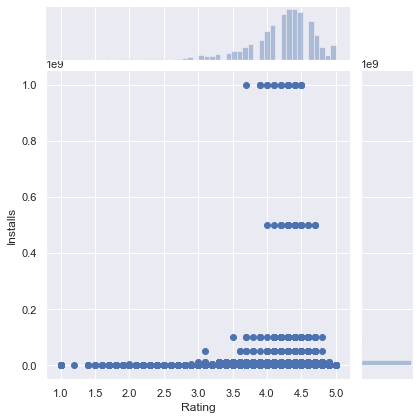

In [76]:
#to find out the rating vs installs
s = df[df.Installs >0]
s = sns.jointplot('Rating','Installs',s)

33


Text(0, 0.5, 'Frequency')

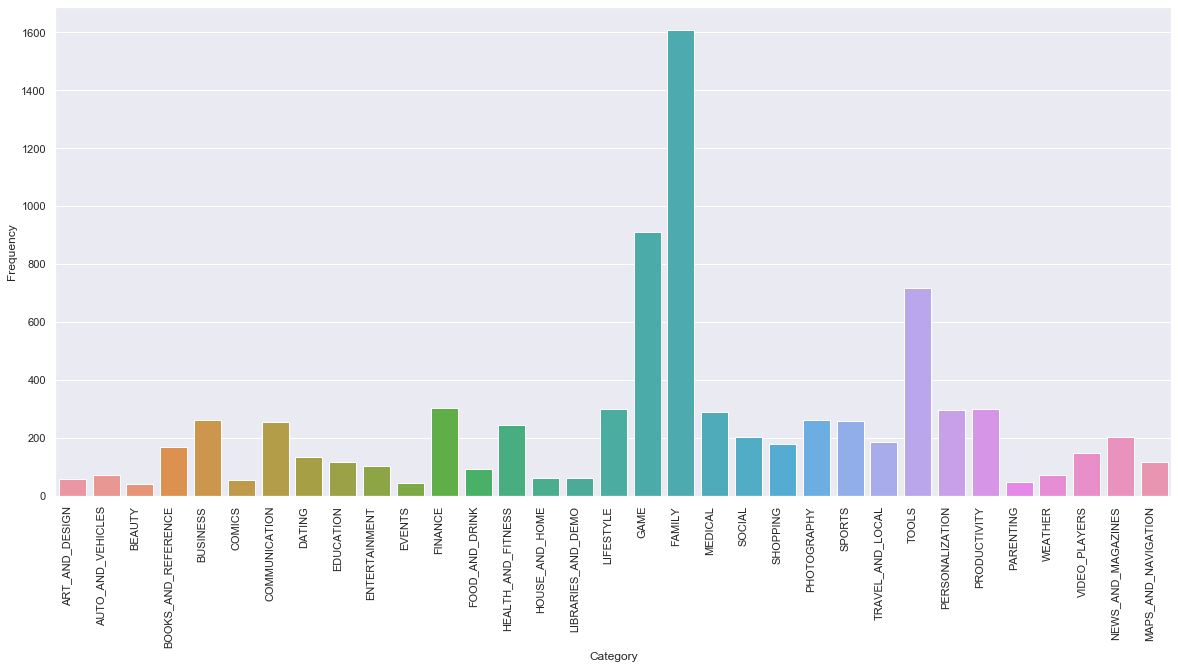

In [14]:
#app distribution on Google Play
df['Category'].unique()
print(df['Category'].nunique())
sns.set(rc={'figure.figsize':(20,9)})
k = sns.countplot(df.Category)
k.set_xlabel("Category")
k.set_xticklabels(k.get_xticklabels(), rotation=90, ha="right")
k.set_ylabel("Frequency")

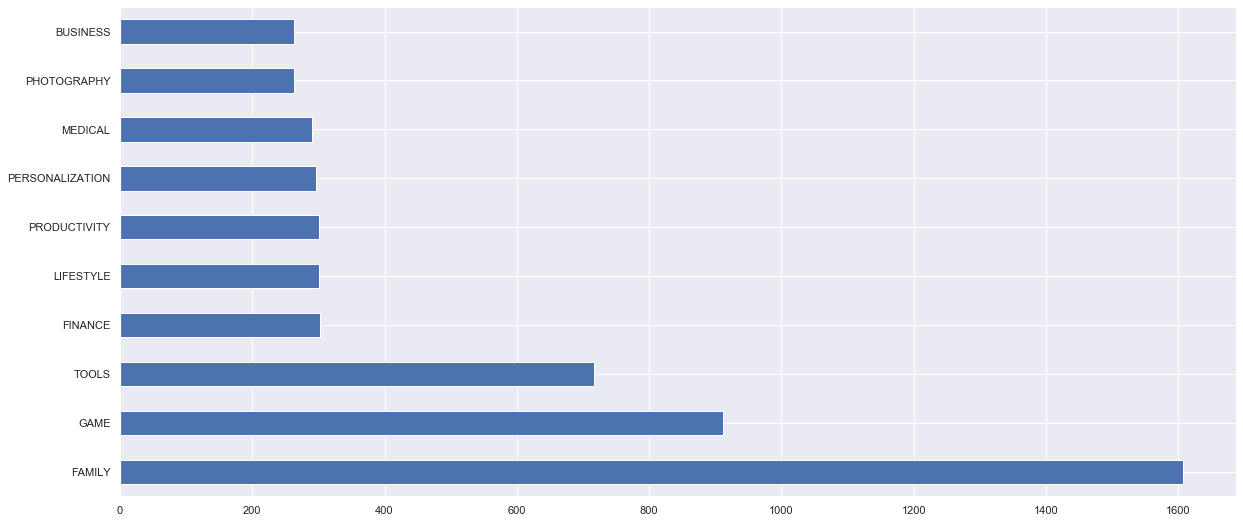

In [15]:
#top 10 most popular type of app available in app store
l = df.Category.value_counts().head(10).plot(kind='barh')


[Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'NEWS_AND_MAGAZINES')]

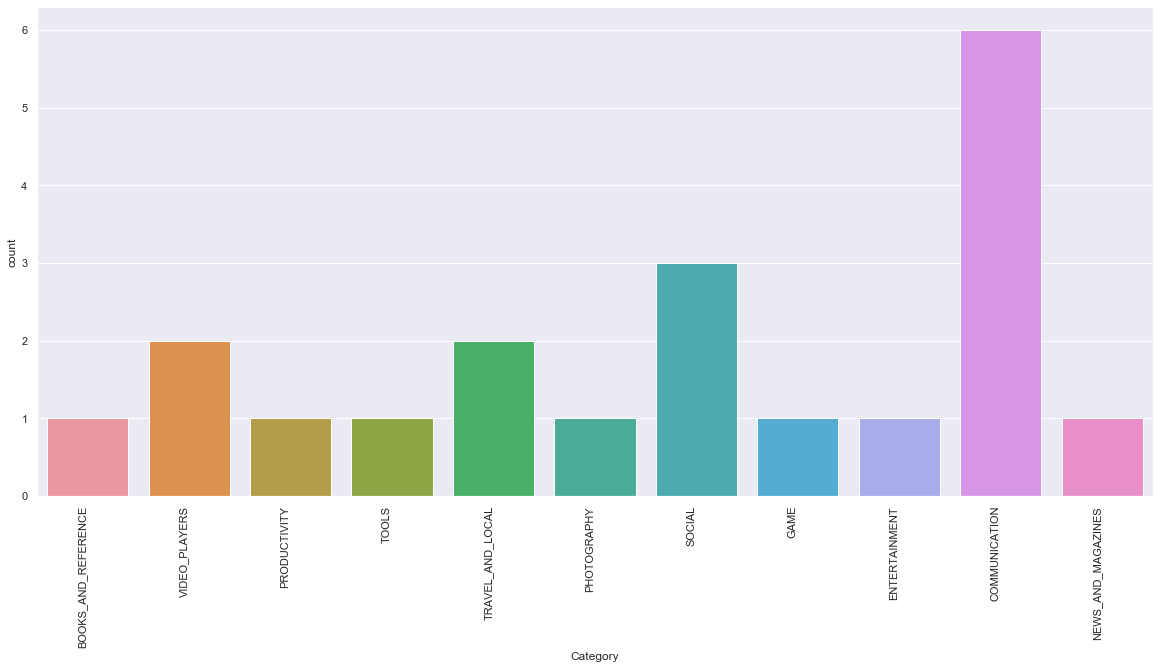

In [70]:
#highest installs on category wise
n = df[df.Installs == 1000000000].sort_values('Installs')
n1 = sns.countplot(n.Category)
n1.set_xticklabels(n1.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'COMICS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'LIBRARIES_AND_DEMO')]

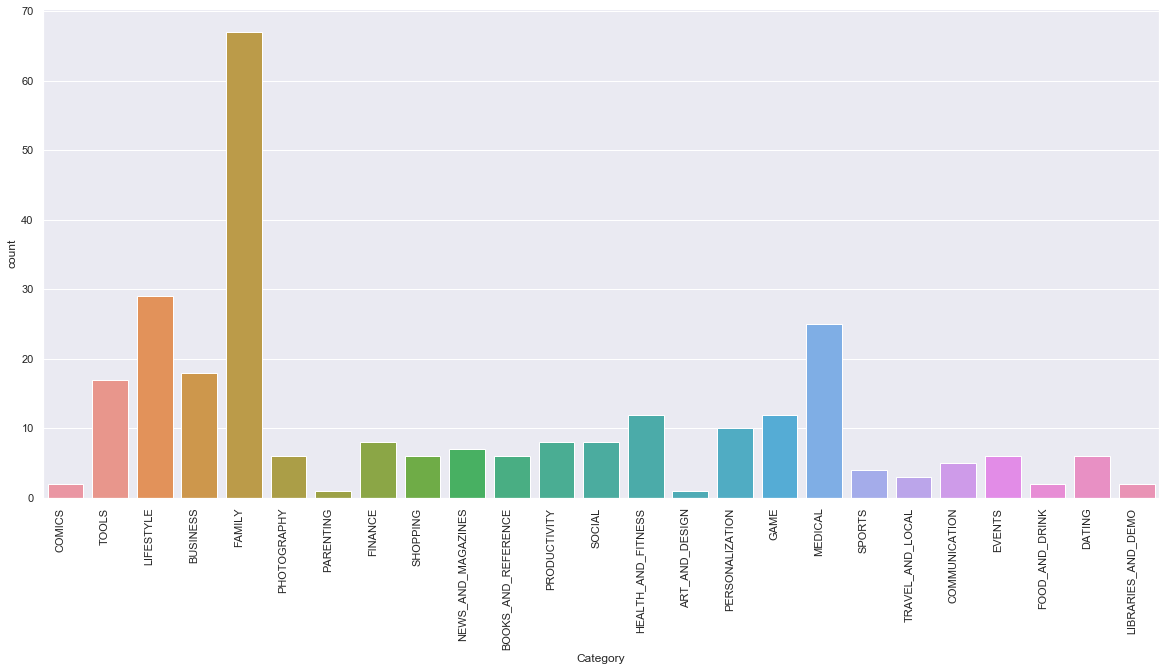

In [71]:
#highest rating on category wise
m = df[df.Rating == 5].sort_values('Rating')
m1 = sns.countplot(m.Category)
m1.set_xticklabels(m1.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'GAME'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'SOCIAL')]

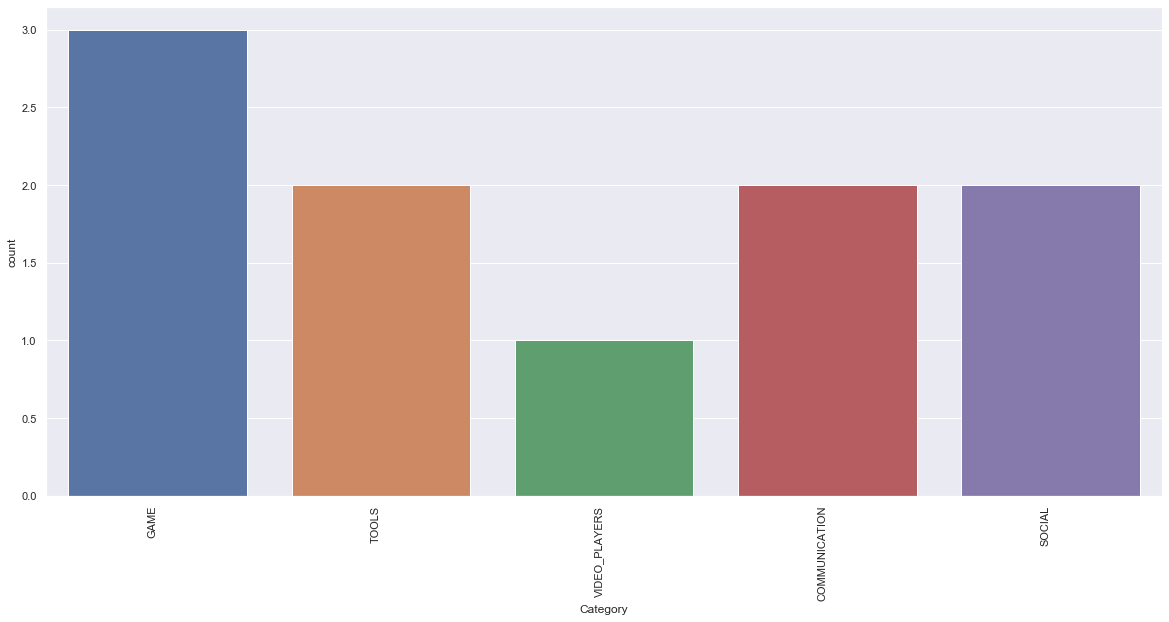

In [72]:
#top 10 highest reviews in Google Play
o = df[df.Reviews > 0].sort_values('Reviews').tail(10)
o1 = sns.countplot(o.Category)
o1.set_xticklabels(o1.get_xticklabels(), rotation=90, ha="right")

In [85]:
grp=df.groupby('Category')
w=grp['Installs'].agg(np.sum)
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(w)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN           114228100
AUTO_AND_VEHICLES         53129800
BEAUTY                    26916200
BOOKS_AND_REFERENCE     1665791655
BUSINESS                 697018120
COMICS                    44931100
COMMUNICATION          11038241530
DATING                   140912410
EDUCATION                352852000
ENTERTAINMENT           2113660000
EVENTS                    15949410
FAMILY                  4427429590
FINANCE                  455312400
FOOD_AND_DRINK           211677750
GAME                   13878762717
HEALTH_AND_FITNESS      1144006220
HOUSE_AND_HOME            97082000
LIBRARIES_AND_DEMO        51083000
LIFESTYLE                503741120
MAPS_AND_NAVIGATION      503267560
MEDICAL                   38152676
NEWS_AND_MAGAZINES      2369110650
PARENTING                 31116110
PERSONALIZATION         1532341930
PHOTOGRAPHY             4649143130
PRODUCTIVITY            5793070180
SHOPPING                1400331540
SOCIAL                  5487841475
SPORTS     

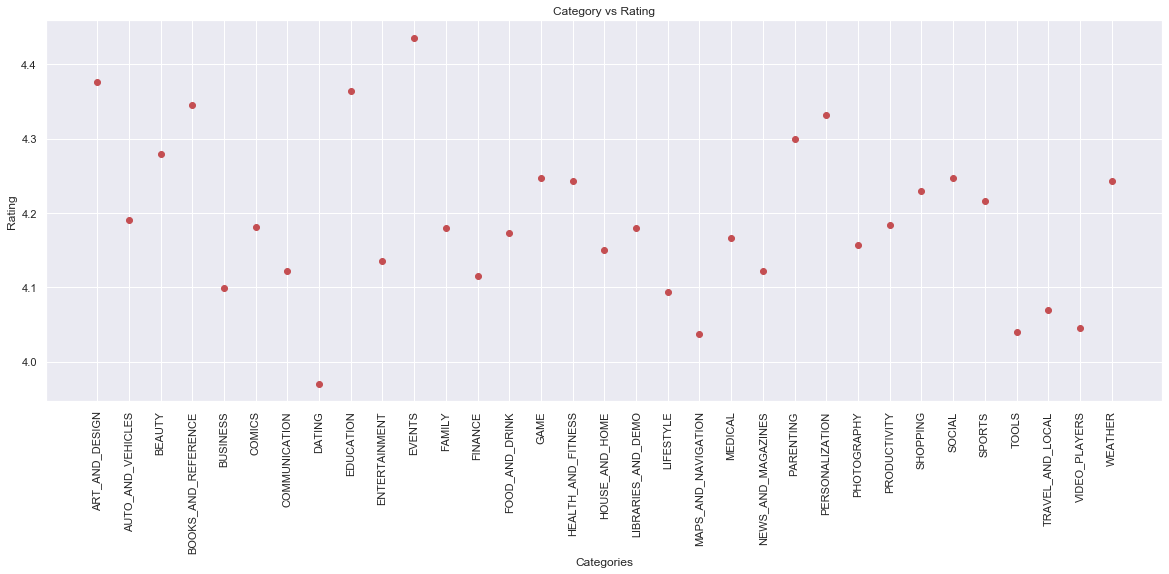

In [81]:
plt.figure(figsize=(20,7))
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Category vs Rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show() #category on average number of ratings

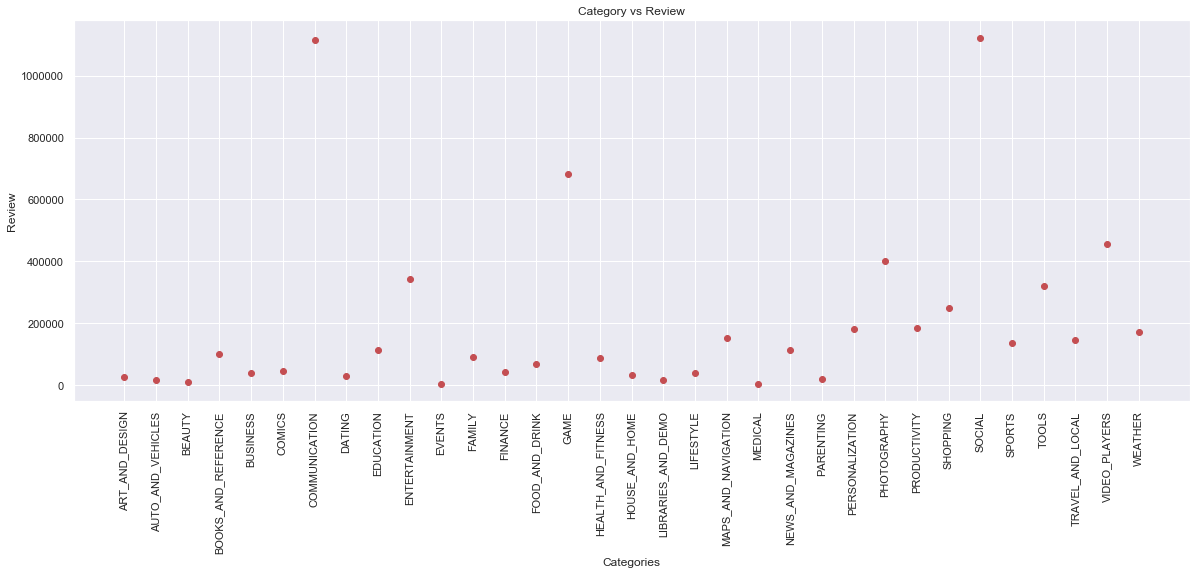

In [82]:
plt.figure(figsize=(20,7))
plt.plot(z,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Category vs Review')
plt.xlabel('Categories')
plt.ylabel('Review')
plt.show() #category on average number of reviews

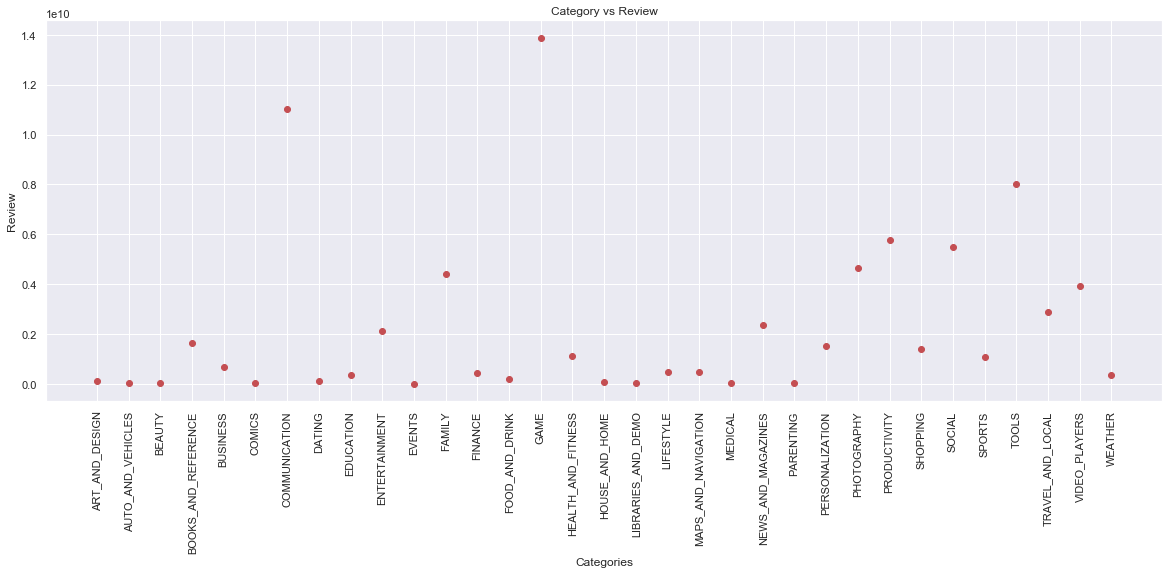

In [86]:
plt.figure(figsize=(20,7))
plt.plot(w,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Category vs Review')
plt.xlabel('Categories')
plt.ylabel('Review')
plt.show() #catergory on total number of install